In [61]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [92]:
# number of observations per sample
n = 100

# number of repetitions
m = 1000

# Choose a distribution to sample from!
# These are implemented in scipy.stats.
#dist = st.norm(5, 1.5)
#dist = st.geom(0.3)
#dist = st.geom(0.9)
dist = st.nbinom(8, 0.4)

# Generate some samples
samples = dist.rvs(size=(n,m))

# Check the mean for the first sample
samples[0].mean()

11.955

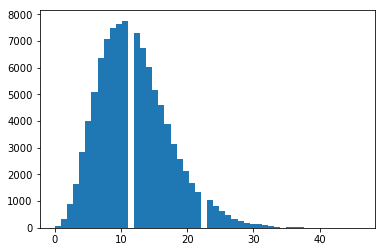

In [93]:
# Show a histogram of all the cases in all the samples.
plt.hist(samples.flatten(), bins=50)
plt.show()

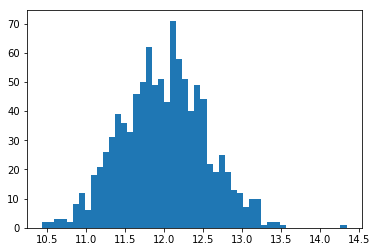

In [94]:
# Show a histogram of the mean from each sample
# If n is large enough and dist isn't too skewed,
# then this should be nearly normal.
means = samples.mean(axis=0)
plt.hist(means, bins=50)
plt.show()

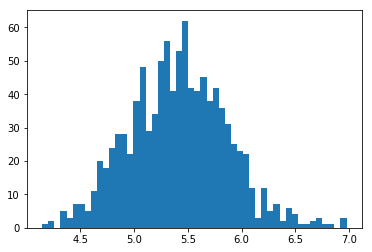

In [95]:
# Compute the standard deviation of each sample
stddevs = samples.std(axis=0)
plt.hist(stddevs, bins=50)
plt.show()

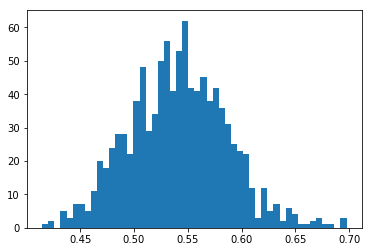

In [96]:
# For a nearly normal distribution of means,
# the standard error of the mean is:
#   standard error (SE) = stddev / sqrt(n)
stderr = stddevs / np.sqrt(n)
plt.hist(stderr, bins=50)
plt.show()

In [97]:
# This is the 95% confidence interval for the first sample
means[0] - 1.96*stderr[0], means[0] + 1.96*stderr[0]

(11.252116176487805, 13.467883823512194)

In [98]:
# This is the true mean of the distribution that generated these samples
dist.mean()

12.0

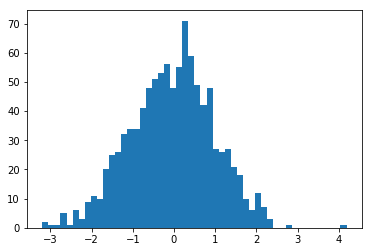

In [99]:
# How close is the true mean to each sample mean?
# Report this as the number of standard errors and show a histogram.
# Hopefully, 95% should be within two SE.
zscores = (means - dist.mean())/stderr
plt.hist(zscores, bins=50)
plt.show()

In [100]:
# Compute the fraction of sample means within 2 SE.
# Should be ~95% if we n is large enough.
(np.abs(zscores) < 2.0).sum()/m

0.94999999999999996